In [151]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate as integrate
import scipy.special as scpsp
from scipy.signal import find_peaks

In [318]:
# Environment parameters
M_sat      = 1e6 #mass of the perturbing satellite
m_field    = 1 #mass of the field particle
log_lambda = 15 #Coulomb Logarithm


# other constants
v        = 178
G        = 0.004491 # pc^3/Msol/Ma^2
rho_crit = 1.478e-7 # Msol/pc^3
c          = 10 #concentration parameter

#Milky Way constants:
rho_0_MW = 12.1e-3 #Milky Way rho_0 in Msol/pc^3 (Abarca http://www.vixra.org/pdf/1606.0007v1.pdf)
R_s_MW = 14.4e3 #Milky Way R_s in pc
#Milky Way mass (only needed if not using NFW calculation)
M_vir_MW= 1.6e12 #virial mass of the milky way (https://arxiv.org/pdf/1405.0306.pdf)
R_vir_MW = 2.6e5 # virial radius of the milky way (https://arxiv.org/pdf/1405.0306.pdf)
V_vir_MW = np.sqrt(G * M_vir_MW / R_vir_MW)

# general functions
def absolute_3(x):
    return np.sqrt(x[0]**2 + x[1]**2 + x[2]**2)

In [219]:
#Defines the density distribution of an NFW Profile
def NFW_Profile(R, rho_0=rho_0_MW, R_s = R_s_MW):
    return rho_0 / (R/R_s * (1 + R/R_s)**2)

#Gives the total mass of an NFW-halo within Radius R
def Interior_Mass(R):
    integral_function = lambda r: NFW_Profile(r) * r**2
    M = 4*math.pi* integrate.romberg(integral_function, 0.1, R, divmax = 10)
    return M

#Gives radial acceleration due to a mass M
def Grav_Acceleration(M, R):
    return -M * G * R / absolute_3(R)**3

In [186]:
# NFW velocity dispersion integral approximation

def s(R):
    return R / R_vir_MW

def g(c):
    return 1 / (np.log(1 + c) - c / (1 + c))

def term_1(R, c, beta = 0):
    #print(g(c) * (1 + c * s(R))**2 * s(R)**(1 - 2 * beta))
    return g(c) * (1 + c * s(R))**2 * s(R)**(1 - 2 * beta)

def sigma_NFW_int(R, c=10, bound=20, beta = 0, V_v=V_vir_MW):
    integral_function = lambda x: (x**(2 * beta - 3) * np.log(1 + c * x) / (1 + c * x)**2 -
                                  c * x**(2 * beta - 2) / (1 + c * x)**3)
    sigma_rel = term_1(R, c, beta) * integrate.romberg(integral_function, s(R), bound, divmax=10)
    return np.sqrt(sigma_rel) * V_v

In [155]:
# NFW velocity dispersion beta=0 analytical solution

def s(R):
    return R / R_vir_MW

def g(c):
    return 1 / (np.log(1 + c) - c / (1 + c))

# approximation for Li2
def Li2(x):
    return np.imag(x * (1 + 10**(-.5) * (-x)**(.62/.7))**(-.7))

def sigma_NFW_ana(r, c=10, V_v=V_vir_MW):
    cs = c*s(r)
    cs1 = cs + 1
    sigma_rel = .5 * c**2 * g(c) * s(r) * cs1**2 * (np.pi**2 - np.log(cs) - 1/cs
                                             - 1/cs1**2 - 6/cs1 + (1 + 1/cs**2 - 4/cs - 2/cs1) * np.log(cs1)
                                             + 3 * np.log(cs1)**2 + 6 * Li2(-cs))
    return np.sqrt(sigma_rel) * V_v

319.94160495161736


C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 2.676349e+00
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.060265e+01
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 2.520519e+02
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 2.338750e+00
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 9.256386e+00
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 2.053054e+02
  w

C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 2.255600e+00
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 9.408862e-02
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 3.523290e-01
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.613731e+00
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 7.454304e-02
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 2.771114e-01
  w

C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 3.263661e-04
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.510734e-04
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 8.607200e-05
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 2.072838e-04
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 8.639442e-05
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 5.602670e-05
  w

C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 2.338900e+00
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 2.143352e+01
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.956590e+00
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.903657e+01
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.628105e+00
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.685691e+01
  w

C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 3.683139e-03
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 2.912291e-01
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 2.558440e-03
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 2.260582e-01
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.759415e-03
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.739930e-01
  w

C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 7.861695e-06
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 4.480732e-06
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 2.518712e-06
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.396233e-06
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 7.632045e-07
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:796: AccuracyWarning: divmax (10) exceeded. Latest difference = 4.113222e-07
  w

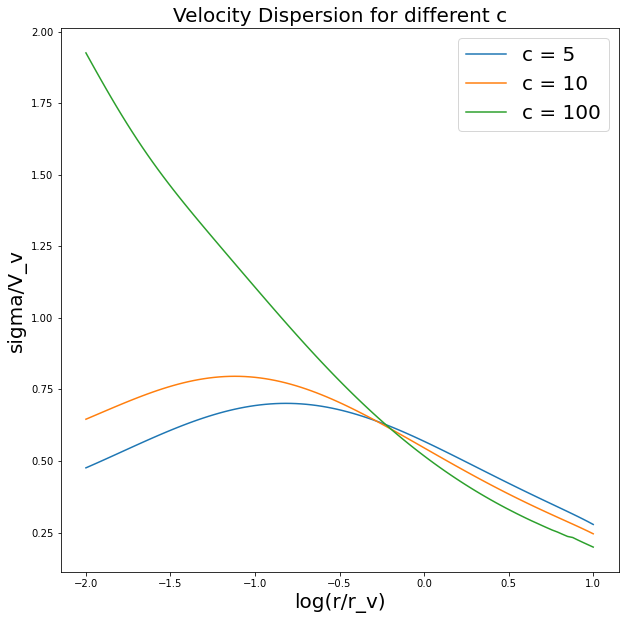

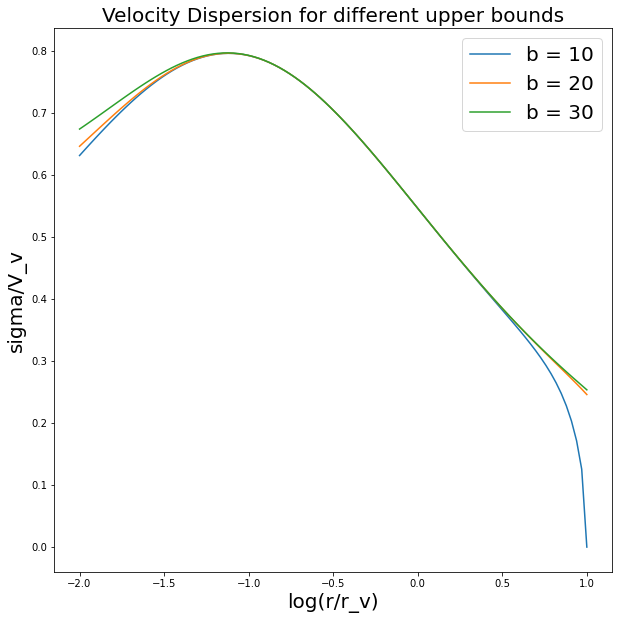

In [187]:
print(sigma_NFW(R_vir_MW))
test_r = np.logspace(-2, 1, 100) * R_vir_MW
#test_sigma_ana = sigma_NFW_ana(test_r)

#different c
test_sigma_int_5 = np.zeros(len(test_r))
test_sigma_int_10 = np.zeros(len(test_r))
test_sigma_int_100 = np.zeros(len(test_r))
for i in range(len(test_r)):
    test_sigma_int_5[i] = sigma_NFW_int(test_r[i], 5)
    test_sigma_int_10[i] = sigma_NFW_int(test_r[i], 10)
    test_sigma_int_100[i] = sigma_NFW_int(test_r[i], 100)

#different integral upper bounds
test_sigma_int_b10 = np.zeros(len(test_r))
test_sigma_int_b20 = np.zeros(len(test_r))
test_sigma_int_b30 = np.zeros(len(test_r))
for i in range(len(test_r)):
    test_sigma_int_b10[i] = sigma_NFW_int(test_r[i], 10, 10)
    test_sigma_int_b20[i] = sigma_NFW_int(test_r[i], 10, 20)
    test_sigma_int_b30[i] = sigma_NFW_int(test_r[i], 10, 30)
    
plt.figure(figsize=(10,10))
plt.plot(np.log10(test_r/R_vir_MW), test_sigma_int_5/V_vir_MW, label='c = 5')
plt.plot(np.log10(test_r/R_vir_MW), test_sigma_int_10/V_vir_MW, label='c = 10')
plt.plot(np.log10(test_r/R_vir_MW), test_sigma_int_100/V_vir_MW, label='c = 100')
plt.title('Velocity Dispersion for different c', fontsize=20)
plt.xlabel('log(r/r_v)', fontsize=20)
plt.ylabel('sigma/V_v', fontsize=20)
plt.legend(fontsize=20)
#plt.savefig('sigma_different_c.png')
         

plt.figure(figsize=(10,10))
plt.plot(np.log10(test_r/R_vir_MW), test_sigma_int_b10/V_vir_MW, label='b = 10')
plt.plot(np.log10(test_r/R_vir_MW), test_sigma_int_b20/V_vir_MW, label='b = 20')
plt.plot(np.log10(test_r/R_vir_MW), test_sigma_int_b30/V_vir_MW, label='b = 30')
plt.title('Velocity Dispersion for different upper bounds', fontsize=20)
plt.xlabel('log(r/r_v)', fontsize=20)
plt.ylabel('sigma/V_v', fontsize=20)
plt.legend(fontsize=20)
#plt.savefig('sigma_different_b.png')

In [211]:
# Dynamical Friction in a Maxwellian
def big_X(v_M, sigma):
    return absolute_3(v_M) / (np.sqrt(2) * sigma)

def term_prefix(log, rho, M):
    #print(- 4 * np.pi * log * G**2 * rho * M)
    return - 4 * np.pi * log * G**2 * rho * M

def term_brackets(v_M, sigma):
    X = big_X(v_M, sigma)
    #print(scpsp.erf(X))
    #print(2 * X / np.sqrt(np.pi) * np.exp(-X**2))
    return (scpsp.erf(X) - 2 * X / np.sqrt(np.pi) * np.exp(-X**2))

def dynamical_friction(R, V):
    rho = NFW_Profile(R)
    sig = sigma_NFW_int(R)
    print(sig)
    return term_prefix(log_lambda, rho, M_sat) / absolute_3(V)**3 * term_brackets(V, sig) * V

In [243]:
print(NFW_Profile(1e5)) # 1584
print(-np.sqrt(G * Interior_Mass(1e5) / 1e5))
v = np.array([0, -156, 0])
print(dynamical_friction(1e5, v))

print(term_prefix(15, 1584, 1e5))

2.7607100591715972e-05
-156.316268414204
113.06954769867426
[-0.0000000e+00  1.7567288e-05 -0.0000000e+00]
-602202.300789743


In [159]:
def simplified_dynamical_friction(R, V):
    rho = NFW_Profile(R)
    sig = 130
    return term_prefix(log_lambda, rho, M_sat) / absolute_3(V)**3 * term_brackets(V, sig) * V

In [160]:
# Energy computations
def kinetic_energy(m, v):
    return .5 * m * v**2

def specific_kinetic_energy(v):
    return .5 * v**2

def potential_NFW(M, R):
    integralFunction = lambda r: r * NFW_Profile(r)
    return - G * M / R + 4 * np.pi * G * integrate.romberg(integralFunction, R, 1e5, divmax=10)

In [330]:
# leapfrog algorithm (kick-drift-kick)

# txt templates:
pos_template = 'variable_altitude/alt_100k/Positions/i{i}positions.txt'
vel_template = 'variable_altitude/alt_100k/Velocities/i{i}velocities.txt'
acc_template = 'variable_altitude/alt_100k/Accelerations/i{i}accelerations.txt'

# setup:
n = 1000
t = 5

position = np.array([0, 1e5, 0])
np.savetxt(pos_template.format(i=0), position)
velocity = np.array([-np.sqrt(G * Interior_Mass(1e5) / 1e5), 0, 0])
#velocity = np.array([100, 1, 0])
np.savetxt(vel_template.format(i=0), velocity)
mass = Interior_Mass(absolute_3(position))

friction = np.zeros((3, n))

# 0-step acceleration:
friction[:, 0] = dynamical_friction(absolute_3(position), velocity)
acceleration = Grav_Acceleration(mass, position) + friction[:, 0]
np.savetxt(acc_template.format(i=0), acceleration)

# loop for every timestep:
for i in range(n):
    # update the position:
    position += t * velocity + .5 * t**2 * acceleration
    np.savetxt(pos_template.format(i=i), position)
    
    # remember the previous acceleration:
    acc_prior = acceleration
    
    #calculate the interior mass:
    mass = Interior_Mass(absolute_3(position))
    
    # extrapolate the previous velocity
    vel_intermediate = velocity + acceleration * t
    
    # calculate the next acceleration:
    friction[:, i] = dynamical_friction(absolute_3(position), vel_intermediate)
    acceleration = Grav_Acceleration(mass, position) + friction[:, i]
    np.savetxt(acc_template.format(i=i), acceleration)
    
    # calculate the next velocity:
    velocity = velocity + .5 * t * (acc_prior + acceleration)
    np.savetxt(vel_template.format(i=i), velocity)

113.06954769867426
113.06954768883648
113.0695476593968
113.06954761050356
113.06954754230694
113.06954745495895
113.06954734861385
113.06954722342746
113.06954707955767
113.06954691716429
113.06954673640871
113.06954653745446
113.06954632046673
113.0695460856125
113.06954583306066
113.06954556298173
113.06954527554811
113.06954497093389
113.06954464931478
113.06954431086837
113.06954395577374
113.06954358421183
113.0695431963651
113.06954279241764
113.06954237255516
113.06954193696507
113.06954148583627
113.0695410193591
113.06954053772567
113.06954004112939
113.06953952976535
113.06953900382989
113.06953846352111
113.06953790903827
113.06953734058219
113.06953675835511
113.06953616256052
113.06953555340343
113.06953493109003
113.06953429582794
113.06953364782595
113.06953298729427
113.06953231444433
113.06953162948871
113.06953093264129
113.06953022411705
113.06952950413228
113.06952877290422
113.06952803065143
113.06952727759342
113.06952651395092
113.06952573994553
113.069524955800

113.07006718362108
113.07007095705241
113.07007472247547
113.07007847965896
113.07008222837216
113.0700859683855
113.07008969947003
113.07009342139787
113.07009713394203
113.07010083687629
113.07010452997564
113.07010821301584
113.07011188577381
113.07011554802745
113.07011919955559
113.07012284013834
113.0701264695568
113.07013008759316
113.07013369403082
113.07013728865427
113.07014087124918
113.07014444160252
113.07014799950238
113.07015154473812
113.07015507710048
113.0701585963813
113.07016210237381
113.0701655948726
113.07016907367364
113.07017253857417
113.07017598937284
113.07017942586981
113.07018284786652
113.07018625516604
113.07018964757272
113.07019302489255
113.07019638693295
113.07019973350286
113.07020306441287
113.070206379475
113.07020967850289
113.07021296131191
113.0702162277189
113.07021947754238
113.0702227106026
113.07022592672133
113.07022912572228
113.0702323074306
113.07023547167341
113.07023861827939
113.07024174707905
113.07024485790478
113.07024795059057
11

113.07038360682846
113.07038509988475
113.0703866174534
113.07038815952802
113.07038972609976
113.07039131715703
113.07039293268619
113.07039457267086
113.07039623709235
113.07039792592948
113.07039963915865
113.07040137675374
113.07040313868629
113.07040492492546
113.07040673543779
113.07040857018752
113.07041042913639
113.07041231224387
113.07041421946684
113.07041615075985
113.07041810607502
113.0704200853621
113.07042208856846
113.07042411563889
113.07042616651601
113.07042824114008
113.07043033944878
113.07043246137758
113.07043460685955
113.07043677582526
113.07043896820325
113.07044118391941
113.07044342289745
113.07044568505871
113.07044797032226
113.07045027860478
113.07045260982065
113.070454963882
113.07045734069871
113.07045974017832
113.07046216222615
113.0704646067451
113.07046707363617
113.07046956279771
113.0704720741261
113.07047460751552
113.07047716285774
113.07047974004256
113.07048233895739
113.07048495948764
113.07048760151648
113.07049026492494
113.07049294959188

In [333]:
# read the results:
position_results = np.zeros((3, n))
velocity_results = np.zeros((3, n))
acceleration_results = np.zeros((3, n))
radiuses = np.zeros(n)
for i in range(n):
    position_results[:, i] = np.loadtxt(pos_template.format(i=i))
    velocity_results[:, i] = np.loadtxt(vel_template.format(i=i))
    acceleration_results[:, i] = np.loadtxt(acc_template.format(i=i))
    radiuses[i] = absolute_3(position_results[:, i])

np.savetxt('variable_altitude/alt_100k/Radiuses.txt', radiuses)
np.savetxt('variable_altitude/alt_100k/Friction.txt', absolute_3(friction))

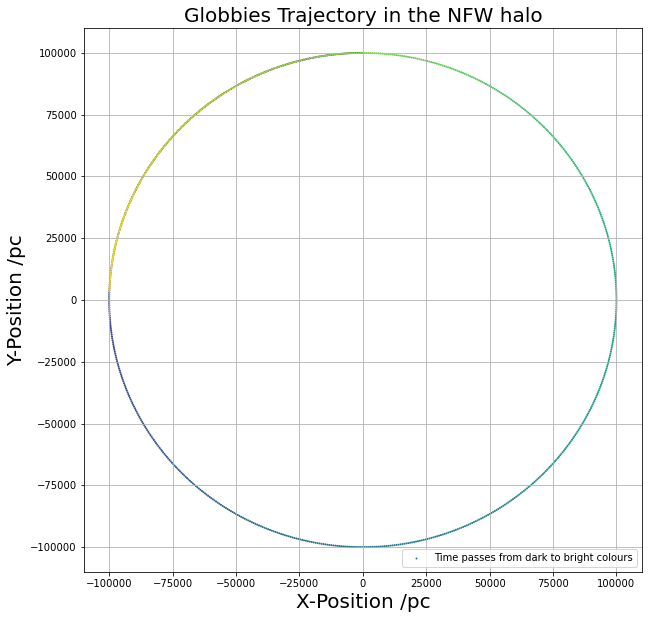

In [337]:
# plot the results:
t_range = np.linspace(0, n-1, n)
plt.figure(figsize=(10,10))
plt.scatter(position_results[0, :], position_results[1, :], 1, t_range, label='Time passes from dark to bright colours')
plt.title('Globbies Trajectory in the NFW halo', fontsize=20)
plt.xlabel('X-Position /pc', fontsize=20)
plt.ylabel('Y-Position /pc', fontsize=20)
plt.legend(loc='lower right')
plt.grid()
plt.savefig('GlobbyDarkMatterOrbit.png')

[186 814]


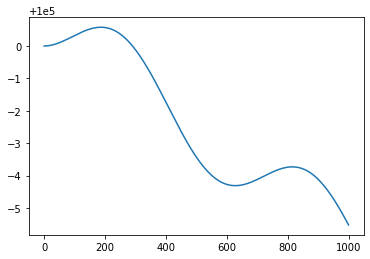

In [335]:
radiuses = np.zeros(n)
for i in range(n):
    radiuses[i] = absolute_3(position_results[:, i])

t_max, _ = find_peaks(radiuses)
print(t_max)
peaks = np.zeros(len(t_max))
for i in range(len(t_max)):
    peaks[i] = radiuses[t_max[i]]
    
plt.plot(t_range, radiuses)

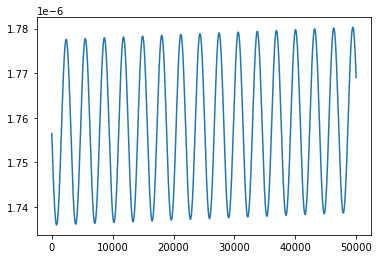

In [273]:
plt.plot(t_range*5, absolute_3(friction))

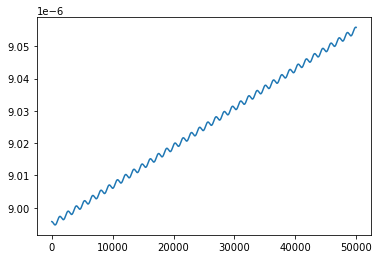

In [283]:
plt.plot(t_range*5, absolute_3(friction))

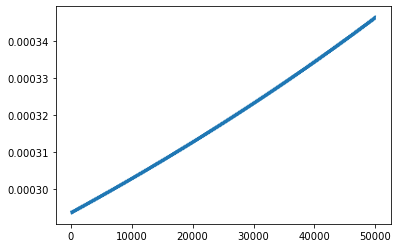

In [289]:
plt.plot(t_range*5, absolute_3(friction))

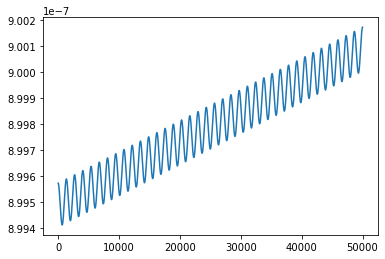

In [306]:
plt.plot(t_range*5, absolute_3(friction))

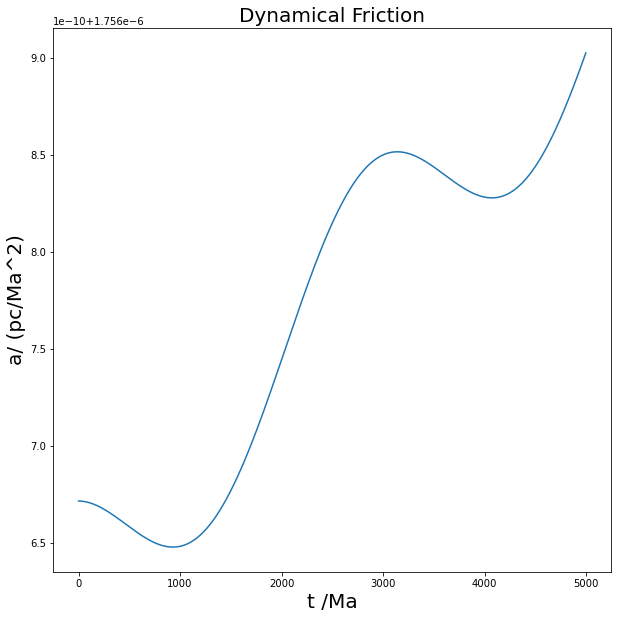

In [339]:
plt.figure(figsize=(10,10))
plt.plot(t_range*5, absolute_3(friction))
plt.title('Dynamical Friction', fontsize=20)
plt.xlabel('t /Ma', fontsize=20)
plt.ylabel('a/ (pc/Ma^2)', fontsize=20)
plt.savefig('GlobbyDarkMatterFriction.png')